In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install flair==0.8

In [ ]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings
from typing import List
import flair.datasets

In [ ]:
downsampled_corpus = flair.datasets.UD_BASQUE().downsample(0.2)

2022-03-01 04:54:09,125 Reading data from /root/.flair/datasets/ud_basque
2022-03-01 04:54:09,127 Train: /root/.flair/datasets/ud_basque/eu_bdt-ud-train.conllu
2022-03-01 04:54:09,128 Dev: /root/.flair/datasets/ud_basque/eu_bdt-ud-dev.conllu
2022-03-01 04:54:09,130 Test: /root/.flair/datasets/ud_basque/eu_bdt-ud-test.conllu


# ASSIGNMENT 1: Trained own NER model on Basque.

In [ ]:
columns = {0: 'text', 1: 'ner'}
corpus: Corpus = ColumnCorpus('/content/data/', columns,
                              train_file='/content/drive/MyDrive/Colab Notebooks/2022-ILTAPP/datasets/ner/eu-train.tsv',
                              test_file='/content/drive/MyDrive/Colab Notebooks/2022-ILTAPP/datasets/ner/eu-test.tsv',
                              dev_file='/content/drive/MyDrive/Colab Notebooks/2022-ILTAPP/datasets/ner/eu-dev.tsv')

2022-03-01 04:54:14,438 Reading data from /content/data
2022-03-01 04:54:14,439 Train: /content/drive/MyDrive/Colab Notebooks/2022-ILTAPP/datasets/ner/eu-train.tsv
2022-03-01 04:54:14,441 Dev: /content/drive/MyDrive/Colab Notebooks/2022-ILTAPP/datasets/ner/eu-dev.tsv
2022-03-01 04:54:14,443 Test: /content/drive/MyDrive/Colab Notebooks/2022-ILTAPP/datasets/ner/eu-test.tsv


In [ ]:
import pandas as pd
data = [[len(corpus.train), len(corpus.test), len(corpus.dev)]]
# Prints out the dataset sizes of train test and development in a table.
pd.DataFrame(data, columns=["Train", "Test", "Development"])

,Train,Test,Development
0,2552,842,2552


In [ ]:
stats = corpus.obtain_statistics()
print(stats)

{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 2552,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 44408,
            "min": 1,
            "max": 113,
            "avg": 17.401253918495296
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 842,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 15351,
            "min": 1,
            "max": 74,
            "avg": 18.231591448931116
        }
    },
    "DEV": {
        "dataset": "DEV",
        "total_number_of_documents": 2552,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 44408,
            "min": 1,
            "max": 113,
            "avg": 17.401253918495296
        }
    }
}


In [ ]:
tag_type = 'ner'

In [ ]:
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary.idx2item)

[b'<unk>', b'O', b'B-ORG', b'B-PER', b'I-PER', b'I-ORG', b'B-LOC', b'I-LOC', b'B-MISC', b'I-MISC', b'<START>', b'<STOP>']


In [ ]:
embedding_types = [
    WordEmbeddings('eu'),
    FlairEmbeddings('eu-forward'),
    FlairEmbeddings('eu-backward'),
]

In [ ]:
embeddings = StackedEmbeddings(embeddings=embedding_types)

In [ ]:
from flair.models import SequenceTagger

tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type=tag_type,
                        use_crf=True)


In [ ]:
from flair.trainers import ModelTrainer

trainer = ModelTrainer(tagger, corpus)

In [ ]:
trainer.train('/content/model/basque',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=5,
              embeddings_storage_mode='gpu')

2022-03-01 05:26:23,745 ----------------------------------------------------------------------------------------------------
2022-03-01 05:26:23,748 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('eu')
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(4488, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=4488, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(4488, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=4488, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4396, out_features=4396, bias=True)
  (rnn): LSTM(4396, 256, batch_first=True, bi

{'dev_loss_history': [3.3215510845184326,
  1.8369810581207275,
  1.4732115268707275,
  1.166841745376587,
  1.0083179473876953],
 'dev_score_history': [0.6274801587301587,
  0.7536578877361001,
  0.7889745859147806,
  0.8326112642772745,
  0.8494411571334648],
 'test_score': 0.7892976588628763,
 'train_loss_history': [14.607301478087901,
  3.0688095435500147,
  2.4662743508815765,
  2.0842278465628623,
  1.8522186644375325]}

In [ ]:
from flair.visual.training_curves import Plotter

2022-03-01 06:23:32,079 ----------------------------------------------------------------------------------------------------
2022-03-01 06:23:32,081 WARNING: No LOSS found for test split in this data.
2022-03-01 06:23:32,082 Are you sure you want to plot LOSS and not another value?
2022-03-01 06:23:32,083 ----------------------------------------------------------------------------------------------------
2022-03-01 06:23:32,106 ----------------------------------------------------------------------------------------------------
2022-03-01 06:23:32,108 WARNING: No F1 found for test split in this data.
2022-03-01 06:23:32,109 Are you sure you want to plot F1 and not another value?
2022-03-01 06:23:32,110 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /content/model/basque/training.png


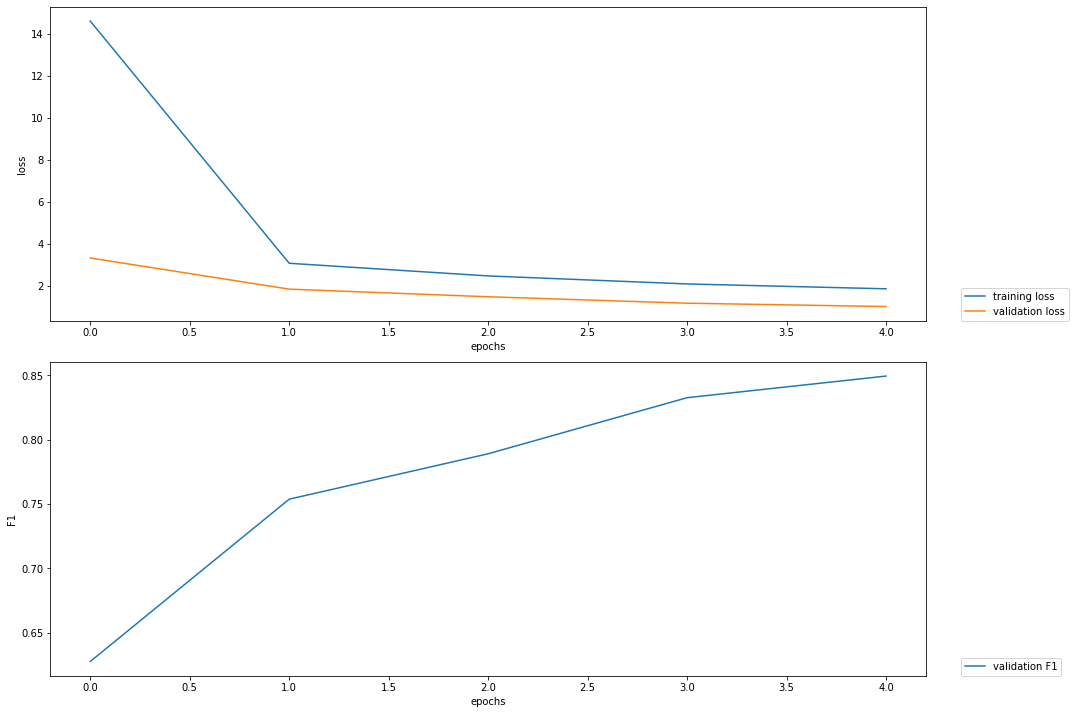

Weights plots are saved in /content/model/basque/weights.png


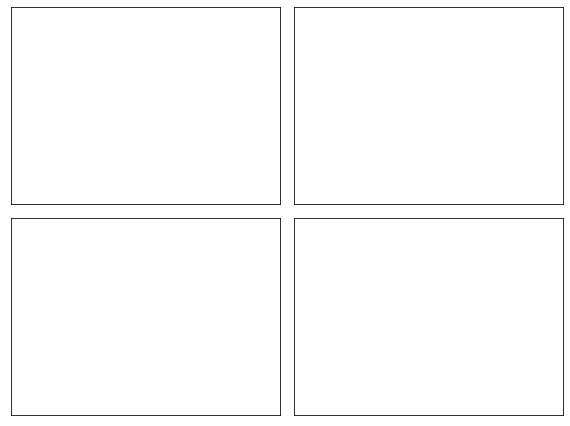

In [ ]:
plotter = Plotter()
plotter.plot_training_curves('/content/model/basque/loss.tsv')
plotter.plot_weights('/content/model/basque/weights.txt')

# ASSIGNMENT 2
In this assignment the trained model in the previous step is used to automatically tag a document/sentence.

In [ ]:
ner_tagger = SequenceTagger.load('/content/model/basque/final-model.pt')

2022-03-01 06:28:29,079 loading file /content/model/basque/final-model.pt


In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [ ]:
input_sentence= 'Nire izena Ravi da, gaur egun Hyderabad-en bizi naiz, Language curry-n egiten dut lan.'
SequenceTagger = SequenceTagger.load('/content/model/basque/final-model.pt')
sentence = Sentence(input_sentence)
tagger.predict(sentence)
print(sentence.to_tagged_string())

2022-03-01 06:33:27,292 loading file /content/model/basque/final-model.pt
Nire izena Ravi <B-PER> da , gaur egun Hyderabad-en <B-LOC> bizi naiz , Language <B-ORG> curry-n egiten dut lan .
